<a href="https://colab.research.google.com/github/clemencia/ML4PPGF_UERJ/blob/master/Integral_MC_pi_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cálculo de $\pi$ usando integração de Monte Carlo

Neste exemplo o valor de $\pi$ é calculado com o método de Monte Carlo. Se geramos aleatóriamente pontos num quadrado de lado 2$r$, que tem área $=4 r^2$, e assignamos o valor 1 aos pontos que estão dentro da circumferencia e valor 0 aos que caem fora, a razão entre o número de pontos gerados dentro e fora do círculo é :

$$ p= \dfrac{N_{in}}{N_{tot}} \approx \dfrac{\pi r^2}{4 r^2}   = \dfrac{\pi}{4}$$

Portanto, a estimativa para o valor de $\pi$ é  :
 
 $$ \pi \approx 4  p = 4 \dfrac{N_{in}}{N_{tot}}$$

pi: 3.15600
sigma: 0.05161


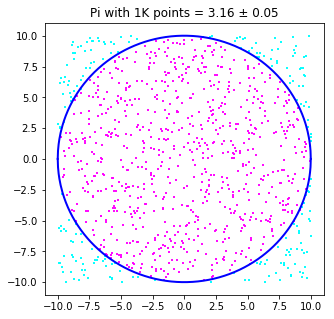

In [4]:
from random import uniform

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 

def MCPi(Radius = 10.0 , Nb_Data = 1000):
  '''Função que calcula o valor de pi através do método de Monte Carlo.
  Retorna duas listas de coordenadas: x e y, a lista com o valor do teste (0 para os pontos fora do circulo, 1 dentro)
  e finalmente o valor estimado de pi e sua incerteza sigma.'''
  x_list = []
  y_list = []
  test = []
  Nb_Data_In = 0
  for i in range(Nb_Data):
      x = uniform(-Radius,Radius)
      y = uniform(-Radius,Radius)
      x_list.append(x)
      y_list.append(y)
      if x**2+y**2 > Radius**2:
        test.append(0)
      else:
        test.append(1)  
        Nb_Data_In = Nb_Data_In + 1

  pi = 4.0 * Nb_Data_In / Nb_Data
  print('pi: {:1.5f}'.format(pi))
  p=pi/4.0
  sigma = 4.0*np.sqrt(p*(1-p)/Nb_Data)
  print('sigma: {:1.5f}'.format(sigma))
  return x_list,y_list,test,pi,sigma

r=10.
x_M,y_M,test,pi, sigma =MCPi(r,1000)
x_np = np.array(x_M)
x_np=np.append(x_np,[-r,r])
x_np.sort()

y_circle = (np.sqrt(10**2 -x_np**2))

colormap =  plt.get_cmap("cool") 
plt.figure(figsize=(5,5))
plt.plot(x_np, y_circle ,linewidth=2, color="blue"  )
plt.plot(x_np, -y_circle , linewidth=2, color="blue")
plt.scatter(x_M,y_M,c=test, cmap=colormap,marker=",",s=1)
plt.title("Pi with 1K points = {:1.2f} ± {:1.2f}".format(pi,sigma))
plt.show()

Ao aumentarmos o  número de pontos gerados, a precisão da estimativa melhora.

pi: 3.14920
sigma: 0.01637


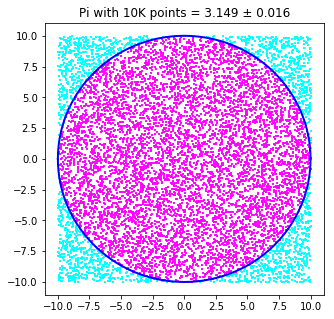

In [2]:
x_DM,y_DM,test,pi,sigma=MCPi(10.,10000)
plt.figure(figsize=(5,5))
plt.plot(x_np, y_circle ,linewidth=2, color="blue" )
plt.plot(x_np, -y_circle , linewidth=2, color="blue")
plt.scatter(x_DM,y_DM,c=test, cmap=colormap,marker=",",s=1)
plt.title("Pi with 10K points = {:1.3f} ± {:1.3f}".format(pi,sigma))
plt.show()

pi: 3.13968
sigma: 0.00164


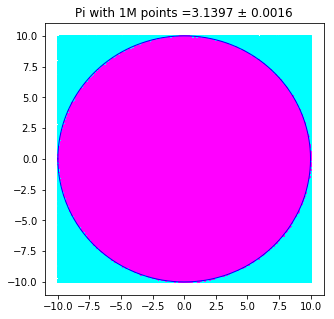

In [3]:
x_G,y_G,test,pi,sigma =MCPi(10.,1000000)
plt.figure(figsize=(5,5))
plt.plot(x_np, y_circle ,linewidth=1, color="blue" )
plt.plot(x_np, -y_circle , linewidth=1, color="blue")
plt.scatter(x_G,y_G,c=test, cmap=colormap,marker=",",s=1)
plt.title("Pi with 1M points ={:1.4f} ± {:1.4f}".format(pi,sigma))
plt.show()